In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt

from load_datasets import data_info, load_phishing, load_mushrooms, load_german, load_w1a, load_w3a, load_a2a, load_w6a
from models import LogisticRegression
from ml_utils import optim_data, optim_bench, models_summary, diagnostic
from grid_search import run_solvers, run_bench, grid_search

C:\Users\Utente\AppData\Local\Temp\ipykernel_7356\3261090548.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
C = 0.5
sgd_steps = (1, 0.5, 0.1, 0.01, 0.001, 0.0005)
sgdd_steps = (1, 0.8, 0.5, 0.1, 0.05, 0.01, 0.005)
# momentum_steps = (0.9, 0.99
sls_steps = (1, 0.5, 0.1, 0.05, 0.01, 0.005)
armijo_damps = (0.3, 0.5, 0.7, 0.9)
momentum_damps = (0.3, 0.5, 0.7)

# w1a

In [3]:
# data_w1a = load_w1a()
data_info(load_w1a())

X_train = (2477, 301), y_train = (2477,)
X_test = (47272, 301), y_test = (47272,)
Class distribution: {-1.0: 0.9709325797335486, 1.0: 0.029067420266451354}


In [4]:
Mw1a_grid = (32, 64)
for i in Mw1a_grid:
    print(f"Iterations: {load_w1a()[1].size / i}")

Iterations: 77.40625
Iterations: 38.703125


## Benchmark

In [5]:
benchw1a = run_bench(load_w1a(), C)

benchw1a_data = optim_bench(benchw1a)

## Fine-tuning

In [6]:
#batchfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, data_w1a[1].size, 0.75)
batchfixed_w1a1, _ = grid_search("SGD-Fixed", C, load_w1a(), (load_w1a()[1].size,), sgd_steps, do_parallel=False)

{'batch': 2477, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 1.004139
Number of combinations analyzed: 6
-----
Solver: SGD-Fixed
Test score: 0.9702360805550855
Objective function: 0.464614
Grad norm: 0.000564
Sol norm: 0.667389
Run-time (seconds): 0.005999
Epochs: 12


In [7]:
#sgdfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, Mw1a, 0.005)
sgdfixed_w1a1, _ = grid_search("SGD-Fixed", C, load_w1a(), Mw1a_grid, sgd_steps, n_jobs=7)
print("% ----- %")
#sgddecre_w1a1 = LogisticRegression("SGD-Decreasing", C).fit(data_w1a, Mw1a, 1)
sgddecre_w1a1, _ = grid_search("SGD-Decreasing", C, load_w1a(), Mw1a_grid, sgdd_steps, n_jobs=7)
print("% ----- %")
#sgdm_w1a1 = LogisticRegression("SGDM", C).fit(data_w1a, Mw1a, 0.05, 0.9)
sgdm_w1a1, _ = grid_search("SGDM", C, load_w1a(), Mw1a_grid, sgd_steps, n_jobs=7)

{'batch': 32, 'alpha': 0.01, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 5.485515
Number of combinations analyzed: 12
-----
Solver: SGD-Fixed
Test score: 0.9702360805550855
Objective function: 0.464615
Grad norm: 0.000852
Sol norm: 0.667311
Run-time (seconds): 0.178659
Epochs: 27
% ----- %
{'batch': 64, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 3.830737
Number of combinations analyzed: 14
-----
Solver: SGD-Decreasing
Test score: 0.9702360805550855
Objective function: 0.464614
Grad norm: 0.000792
Sol norm: 0.667400
Run-time (seconds): 0.089452
Epochs: 27
% ----- %
{'batch': 32, 'alpha': 0.01, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 6.062097
Number of combinations analyzed: 12
-----
Solver: SGDM
Test score: 0.9702360805550855
Objective function: 0.464615
Grad norm: 0.000978
Sol norm: 0.667383
Run-time (seconds): 2.920177
Epochs: 386


In [8]:
#sgdarmijo_w1a1 = LogisticRegression("SGD-Armijo", C).fit(data_w1a, Mw1a, 0.05, damp_armijo=0.5)
sgdarmijo_w1a1, _ = grid_search("SGD-Armijo", C, load_w1a(), Mw1a_grid, sls_steps, delta_a=armijo_damps, n_jobs=7)
print("% ------ %")
#mslc_w1a1 = LogisticRegression("MSL-SGDM-C", C).fit(data_w1a, Mw1a, 0.5, 0.9, damp_armijo=0.5, damp_momentum=0.5)
mslc_w1a1, _ = grid_search("MSL-SGDM-C", C, load_w1a(), Mw1a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=7)
print("% ------ %")
#mslr_w1a1 = LogisticRegression("MSL-SGDM-R", C).fit(data_w1a, Mw1a, 0.5, 0.9, damp_armijo=0.5)
mslr_w1a1, _ = grid_search("MSL-SGDM-R", C, load_w1a(), Mw1a_grid, sls_steps, delta_a=armijo_damps, n_jobs=7)

{'batch': 64, 'alpha': 0.05, 'beta': 0, 'delta_a': 0.5, 'delta_m': 0}
Grid search run-time (seconds): 33.791152
Number of combinations analyzed: 48
-----
Solver: SGD-Armijo
Test score: 0.9713995599932307
Objective function: 0.536138
Grad norm: 0.362781
Sol norm: 0.455603
Run-time (seconds): 3.295386
Epochs: 600
% ------ %
{'batch': 64, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0.7}
Grid search run-time (seconds): 121.893207
Number of combinations analyzed: 144
-----
Solver: MSL-SGDM-C
Test score: 0.9702360805550855
Objective function: 0.464693
Grad norm: 0.009149
Sol norm: 0.665656
Run-time (seconds): 3.097590
Epochs: 600
% ------ %
{'batch': 64, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 42.626958
Number of combinations analyzed: 48
-----
Solver: MSL-SGDM-R
Test score: 0.9702360805550855
Objective function: 0.464693
Grad norm: 0.009144
Sol norm: 0.665659
Run-time (seconds): 3.109111
Epochs: 600


In [9]:
fine_w1a_data = optim_data([batchfixed_w1a1, sgdfixed_w1a1, sgddecre_w1a1, sgdm_w1a1, sgdarmijo_w1a1, mslc_w1a1, mslr_w1a1])

test_w1a = models_summary(fine_w1a_data, benchw1a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_w1a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
7,SGD-Armijo,0.5,64.0,0.050,0.0,0.536138,0.362781,3.295386,600,0.973355,0.971400,0.541667,0.519545,0.455603
1,Newton-CG,0.5,NaN,NaN,NaN,0.464614,0.000046,NaN,6,0.970933,0.970236,0.500000,0.500000,0.667394
2,CG,0.5,NaN,NaN,NaN,0.464614,0.000009,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667395
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.464614,0.000023,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667406
3,SGD-Fixed,0.5,2477.0,1.000,0.0,0.464614,0.000564,0.005999,12,0.970933,0.970236,0.500000,0.500000,0.667389
5,SGD-Decreasing,0.5,64.0,0.500,0.0,0.464614,0.000792,0.089452,27,0.970933,0.970236,0.500000,0.500000,0.667400
4,SGD-Fixed,0.5,32.0,0.010,0.0,0.464615,0.000852,0.178659,27,0.970933,0.970236,0.500000,0.500000,0.667311
6,SGDM,0.5,32.0,0.010,0.9,0.464615,0.000978,2.920177,386,0.970933,0.970236,0.500000,0.500000,0.667383
9,MSL-SGDM-R,0.5,64.0,0.005,0.9,0.464693,0.009144,3.109111,600,0.970933,0.970236,0.500000,0.500000,0.665659
8,MSL-SGDM-C,0.5,64.0,0.005,0.9,0.464693,0.009149,3.097590,600,0.970933,0.970236,0.500000,0.500000,0.665656


In [10]:
print(test_w1a[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
SGD-Armijo & 600 & 3.295386 & 0.455603 & 0.536138 & 0.362781 & 0.971400 \\
Newton-CG & 6 & NaN & 0.667394 & 0.464614 & 0.000046 & 0.970236 \\
CG & 7 & NaN & 0.667395 & 0.464614 & 0.000009 & 0.970236 \\
L-BFGS-B & 7 & NaN & 0.667406 & 0.464614 & 0.000023 & 0.970236 \\
SGD-Fixed & 12 & 0.005999 & 0.667389 & 0.464614 & 0.000564 & 0.970236 \\
SGD-Decreasing & 27 & 0.089452 & 0.667400 & 0.464614 & 0.000792 & 0.970236 \\
SGD-Fixed & 27 & 0.178659 & 0.667311 & 0.464615 & 0.000852 & 0.970236 \\
SGDM & 386 & 2.920177 & 0.667383 & 0.464615 & 0.000978 & 0.970236 \\
MSL-SGDM-R & 600 & 3.109111 & 0.665659 & 0.464693 & 0.009144 & 0.970236 \\
MSL-SGDM-C & 600 & 3.097590 & 0.665656 & 0.464693 & 0.009149 & 0.970236 \\
\bottomrule
\end{tabular}



## SGD

In [7]:
# BatchGD-Fixed
batchfixed_w1a = run_solvers("SGD-Fixed", C, load_w1a(), load_w1a()[1].size, do_parallel=False)

Run-time (seconds): 0.328649


In [4]:
# SGD-Fixed
sgdfixed_w1a = run_solvers("SGD-Fixed", C, load_w1a(), 32, do_parallel=False)
# SGD-Decreasing
sgddecre_w1a = run_solvers("SGD-Decreasing", C, load_w1a(), 64, do_parallel=False)
# SGDM
sgdm_w1a = run_solvers("SGDM", C, load_w1a(), 32, do_parallel=False)

Run-time (seconds): 3.233158
Run-time (seconds): 1.750711
Run-time (seconds): 3.217797


In [5]:
# SGD-Armijo
sgdarmijo_w1a = run_solvers("SGD-Armijo", C, load_w1a(), 64, delta_a=0.5, do_parallel=False)
# MSL-SGDM-C
mslc_w1a = run_solvers("MSL-SGDM-C", C, load_w1a(), 64, delta_a=0.9, delta_m=0.7, do_parallel=False)
# MSL-SGDM-R
mslr_w1a = run_solvers("MSL-SGDM-R", C, load_w1a(), 64, delta_a=0.9, do_parallel=False)

Run-time (seconds): 2.596008
Run-time (seconds): 2.467751
Run-time (seconds): 2.484227


In [8]:
modelsw1a_data = optim_data(batchfixed_w1a + sgdfixed_w1a + sgddecre_w1a + sgdm_w1a + sgdarmijo_w1a + mslc_w1a + mslr_w1a)

## Summary

In [10]:
models_summary(modelsw1a_data, benchw1a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
3,SGD-Fixed,0.5,2477.0,1.00,0.0,0.464614,2.987466e-16,0.091967,200,0.970933,0.970236,0.500000,0.500000,0.667394
1,Newton-CG,0.5,NaN,NaN,NaN,0.464614,4.563869e-05,NaN,6,0.970933,0.970236,0.500000,0.500000,0.667394
2,CG,0.5,NaN,NaN,NaN,0.464614,8.613627e-06,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667395
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.464614,2.333669e-05,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667406
10,SGD-Decreasing,0.5,64.0,0.10,0.0,0.464614,3.391915e-05,0.589755,200,0.970933,0.970236,0.500000,0.500000,0.667403
4,SGD-Fixed,0.5,2477.0,0.10,0.0,0.464614,8.167528e-05,0.080485,200,0.970933,0.970236,0.500000,0.500000,0.667393
9,SGD-Decreasing,0.5,64.0,1.00,0.0,0.464614,1.362337e-04,0.613273,200,0.970933,0.970236,0.500000,0.500000,0.667415
8,SGD-Fixed,0.5,32.0,0.01,0.0,0.464615,9.837897e-04,1.121969,200,0.970933,0.970236,0.500000,0.500000,0.667700
13,SGDM,0.5,32.0,0.10,0.9,0.464616,1.427547e-03,1.137600,200,0.970933,0.970236,0.500000,0.500000,0.667781
12,SGDM,0.5,32.0,1.00,0.9,0.464762,1.268830e-02,1.132080,200,0.970933,0.970236,0.500000,0.500000,0.672487


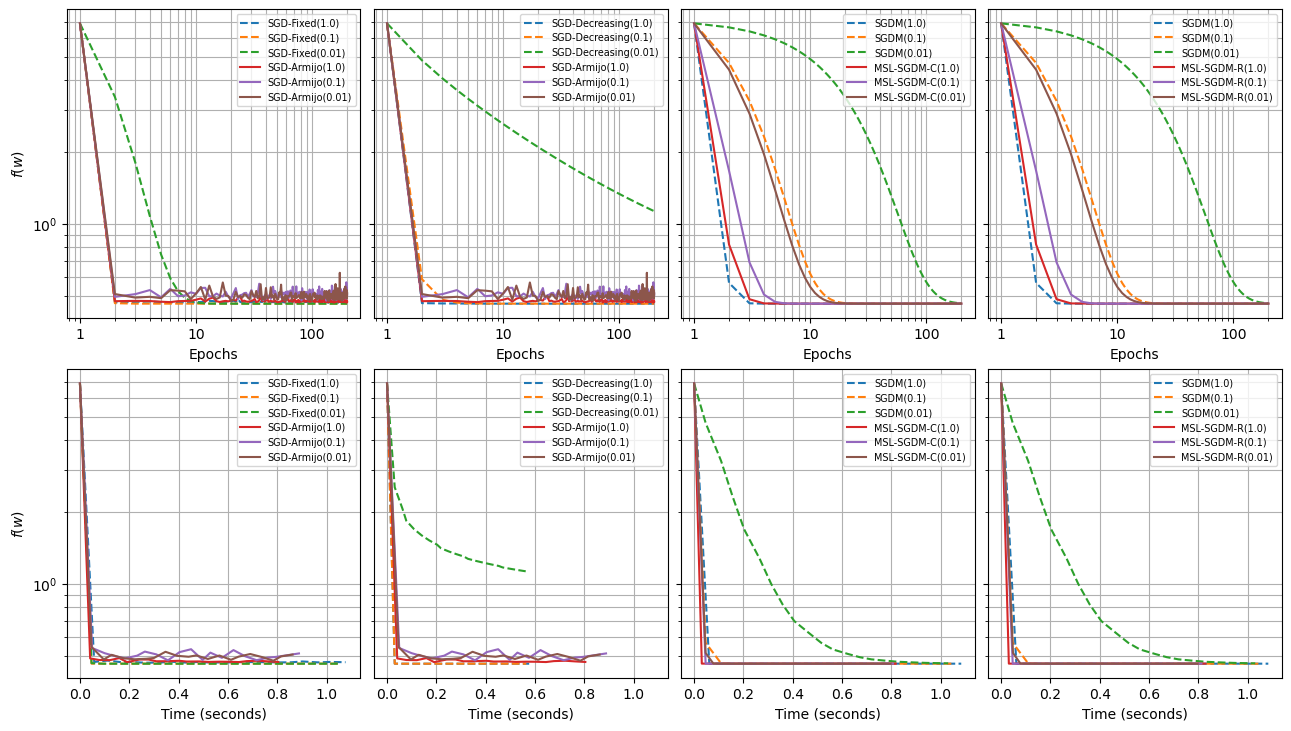

In [9]:
diagnostic([sgdfixed_w1a, sgddecre_w1a, sgdm_w1a, sgdarmijo_w1a, mslc_w1a, mslr_w1a])
plt.savefig("./plots/w1a-diagnostic.pdf")

# w3a

In [12]:
data_info(load_w3a())

X_train = (4912, 301), y_train = (4912,)
X_test = (44837, 301), y_test = (44837,)
Class distribution: {-1.0: 0.9708876221498371, 1.0: 0.029112377850162866}


In [11]:
Mw3a_grid = (64, 128)
for i in Mw3a_grid:
    print(f"Iterations: {load_w3a()[1].size / i}")

Iterations: 76.75
Iterations: 38.375


## Benchmark

In [12]:
benchw3a = run_bench(load_w3a(), C)

benchw3a_data = optim_bench(benchw3a)

## Fine-tuning

In [13]:
batchfixed_w3a1, _ = grid_search("SGD-Fixed", C, load_w3a(), (load_w3a()[1].size,), sgd_steps)

{'batch': 4912, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 0.620631
Number of combinations analyzed: 6
-----
Solver: SGD-Fixed
Test score: 0.9702031804090372
Objective function: 0.462742
Grad norm: 0.000564
Sol norm: 0.666635
Run-time (seconds): 0.024093
Epochs: 12


In [14]:
sgdfixed_w3a1, _ = grid_search("SGD-Fixed", C, load_w3a(), Mw3a_grid, sgd_steps)
print("% ----- %")
sgddecre_w3a1, _ = grid_search("SGD-Decreasing", C, load_w3a(), Mw3a_grid, sgdd_steps)
print("% ----- %")
sgdm_w3a1, _ = grid_search("SGDM", C, load_w3a(), Mw3a_grid, sgd_steps)

{'batch': 64, 'alpha': 0.01, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 5.196227
Number of combinations analyzed: 12
-----
Solver: SGD-Fixed
Test score: 0.9702031804090372
Objective function: 0.462743
Grad norm: 0.000949
Sol norm: 0.666893
Run-time (seconds): 0.154913
Epochs: 23
% ----- %
{'batch': 128, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 3.890462
Number of combinations analyzed: 14
-----
Solver: SGD-Decreasing
Test score: 0.9702031804090372
Objective function: 0.462743
Grad norm: 0.000876
Sol norm: 0.666731
Run-time (seconds): 0.165705
Epochs: 19
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 5.624867
Number of combinations analyzed: 12
-----
Solver: SGDM
Test score: 0.9702031804090372
Objective function: 0.462743
Grad norm: 0.000895
Sol norm: 0.666594
Run-time (seconds): 0.491088
Epochs: 45


In [15]:
sgdarmijo_w3a1, _ = grid_search("SGD-Armijo", C, load_w3a(), Mw3a_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)
print("% ----- %")
mslc_w3a1, _ = grid_search("MSL-SGDM-C", C, load_w3a(), Mw3a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=8)
print("% ----- %")
mslr_w3a1, _ = grid_search("MSL-SGDM-R", C, load_w3a(), Mw3a_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)

{'batch': 64, 'alpha': 0.01, 'beta': 0, 'delta_a': 0.3, 'delta_m': 0}
Grid search run-time (seconds): 34.301719
Number of combinations analyzed: 48
-----
Solver: SGD-Armijo
Test score: 0.9710060887213685
Objective function: 0.500431
Grad norm: 0.268456
Sol norm: 0.478986
Run-time (seconds): 8.097415
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0.5}
Grid search run-time (seconds): 128.380338
Number of combinations analyzed: 144
-----
Solver: MSL-SGDM-C
Test score: 0.9702031804090372
Objective function: 0.462787
Grad norm: 0.006924
Sol norm: 0.667576
Run-time (seconds): 3.590718
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 43.110840
Number of combinations analyzed: 48
-----
Solver: MSL-SGDM-R
Test score: 0.9702031804090372
Objective function: 0.462787
Grad norm: 0.006924
Sol norm: 0.667576
Run-time (seconds): 3.515047
Epochs: 600


In [16]:
fine_w3a_data = optim_data([batchfixed_w3a1, sgdfixed_w3a1, sgddecre_w3a1, sgdm_w3a1, sgdarmijo_w3a1, mslc_w3a1, mslr_w3a1])

test_w3a = models_summary(fine_w3a_data, benchw3a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_w3a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
7,SGD-Armijo,0.5,64.0,0.010,0.0,0.500431,0.268456,8.097415,600,0.971702,0.971006,0.513986,0.513473,0.478986
1,Newton-CG,0.5,NaN,NaN,NaN,0.462742,0.000011,NaN,6,0.970888,0.970203,0.500000,0.500000,0.666640
2,CG,0.5,NaN,NaN,NaN,0.462742,0.000022,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666648
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.462742,0.000033,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666658
3,SGD-Fixed,0.5,4912.0,1.000,0.0,0.462742,0.000564,0.024093,12,0.970888,0.970203,0.500000,0.500000,0.666635
5,SGD-Decreasing,0.5,128.0,0.500,0.0,0.462743,0.000876,0.165705,19,0.970888,0.970203,0.500000,0.500000,0.666731
4,SGD-Fixed,0.5,64.0,0.010,0.0,0.462743,0.000949,0.154913,23,0.970888,0.970203,0.500000,0.500000,0.666893
6,SGDM,0.5,64.0,0.100,0.9,0.462743,0.000895,0.491088,45,0.970888,0.970203,0.500000,0.500000,0.666594
8,MSL-SGDM-C,0.5,128.0,0.005,0.9,0.462787,0.006924,3.590718,600,0.970888,0.970203,0.500000,0.500000,0.667576
9,MSL-SGDM-R,0.5,128.0,0.005,0.9,0.462787,0.006924,3.515047,600,0.970888,0.970203,0.500000,0.500000,0.667576


In [26]:
print(test_w3a[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
SGD-Armijo & 600 & 8.097415 & 0.478986 & 0.500431 & 0.268456 & 0.971006 \\
Newton-CG & 6 & NaN & 0.666640 & 0.462742 & 0.000011 & 0.970203 \\
CG & 7 & NaN & 0.666648 & 0.462742 & 0.000022 & 0.970203 \\
L-BFGS-B & 7 & NaN & 0.666658 & 0.462742 & 0.000033 & 0.970203 \\
SGD-Fixed & 12 & 0.024093 & 0.666635 & 0.462742 & 0.000564 & 0.970203 \\
SGD-Decreasing & 19 & 0.165705 & 0.666731 & 0.462743 & 0.000876 & 0.970203 \\
SGD-Fixed & 23 & 0.154913 & 0.666893 & 0.462743 & 0.000949 & 0.970203 \\
SGDM & 45 & 0.491088 & 0.666594 & 0.462743 & 0.000895 & 0.970203 \\
MSL-SGDM-C & 600 & 3.590718 & 0.667576 & 0.462787 & 0.006924 & 0.970203 \\
MSL-SGDM-R & 600 & 3.515047 & 0.667576 & 0.462787 & 0.006924 & 0.970203 \\
\bottomrule
\end{tabular}



## SGD

In [21]:
# BatchGD-Fixed
batchfixed_w3a = run_solvers("SGD-Fixed", C, load_w3a(), load_w3a()[1].size)

Run-time (seconds): 0.503351


In [10]:
# SGD-Fixed
sgdfixed_w3a = run_solvers("SGD-Fixed", C, load_w3a(), 64)
# SGD-Decreasing
sgddecre_w3a = run_solvers("SGD-Decreasing", C, load_w3a(), 128)
# SGDM
sgdm_w3a = run_solvers("SGDM", C, load_w3a(), 64)

Run-time (seconds): 3.432642
Run-time (seconds): 1.975903
Run-time (seconds): 3.388588


In [11]:
# SGD-Armijo
sgdarmijo_w3a = run_solvers("SGD-Armijo", C, load_w3a(), 64, delta_a=0.3)
# MSL-SGDM-C
mslc_w3a = run_solvers("MSL-SGDM-C", C, load_w3a(), 128, delta_a=0.9, delta_m=0.5)
# MSL-SGDM-R
mslr_w3a = run_solvers("MSL-SGDM-R", C, load_w3a(), 128, delta_a=0.9)

Run-time (seconds): 4.798833
Run-time (seconds): 2.774952
Run-time (seconds): 2.791879


In [24]:
modelsw3a_data = optim_data(batchfixed_w3a + sgdfixed_w3a + sgddecre_w3a + sgdm_w3a + sgdarmijo_w3a + mslc_w3a + mslr_w3a)

## Summary

In [25]:
models_summary(modelsw3a_data, benchw3a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.462742,1.083164e-05,NaN,6,0.970888,0.970203,0.500000,0.500000,0.666640
3,SGD-Fixed,0.5,4912.0,1.00,0.0,0.462742,1.468397e-16,0.138247,200,0.970888,0.970203,0.500000,0.500000,0.666640
2,CG,0.5,NaN,NaN,NaN,0.462742,2.176325e-05,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666648
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.462742,3.267110e-05,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666658
10,SGD-Decreasing,0.5,128.0,0.10,0.0,0.462742,3.243414e-05,0.669518,200,0.970888,0.970203,0.500000,0.500000,0.666647
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.462742,8.337571e-05,0.681427,200,0.970888,0.970203,0.500000,0.500000,0.666662
4,SGD-Fixed,0.5,4912.0,0.10,0.0,0.462742,8.164157e-05,0.131162,200,0.970888,0.970203,0.500000,0.500000,0.666639
8,SGD-Fixed,0.5,64.0,0.01,0.0,0.462742,6.384729e-04,1.196832,200,0.970888,0.970203,0.500000,0.500000,0.666490
13,SGDM,0.5,64.0,0.10,0.9,0.462743,1.069982e-03,1.187193,200,0.970888,0.970203,0.500000,0.500000,0.666326
20,MSL-SGDM-C,0.5,128.0,0.01,0.9,0.462848,1.058395e-02,0.929430,200,0.970888,0.970203,0.500000,0.500000,0.665931


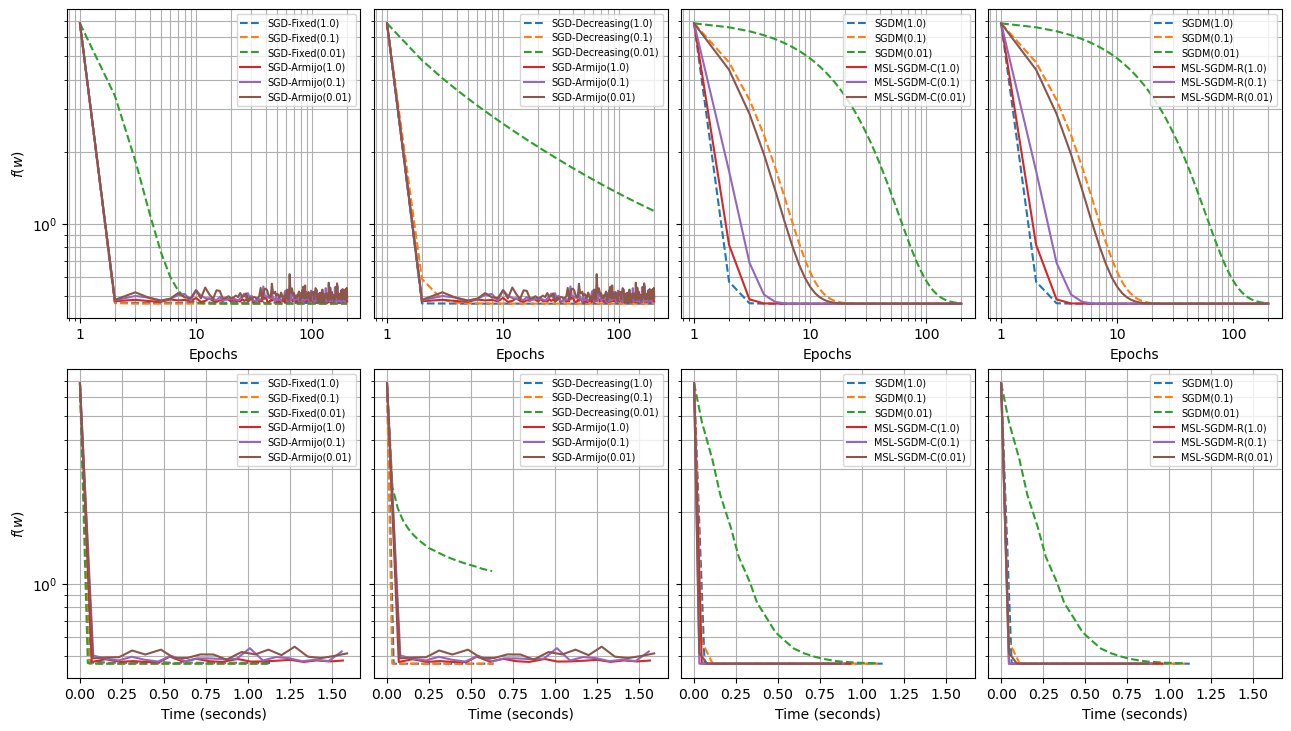

In [12]:
diagnostic([sgdfixed_w3a, sgddecre_w3a, sgdm_w3a, sgdarmijo_w3a, mslc_w3a, mslr_w3a])
plt.savefig("./plots/w3a-diagnostic.pdf")

# Phishing

In [27]:
data_info(load_phishing())

X_train = (8844, 69), y_train = (8844,)
X_test = (2211, 69), y_test = (2211,)
Class distribution: {-1: 0.44572591587516963, 1: 0.5542740841248304}


In [18]:
Mphish_grid = (64, 128)
for i in Mphish_grid:
    print(f"Iterations: {load_phishing()[1].size / i}")

Iterations: 138.1875
Iterations: 69.09375


## Benchmark

In [19]:
benchphish = run_bench(load_phishing(), C)

benchphish_data = optim_bench(benchphish)

## Fine-tuning

In [20]:
batchfixed_phish1, _ = grid_search("SGD-Fixed", C, load_phishing(), (load_phishing()[1].size,), sgd_steps)

{'batch': 8844, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 1.657507
Number of combinations analyzed: 6
-----
Solver: SGD-Fixed
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000534
Sol norm: 0.164001
Run-time (seconds): 0.044791
Epochs: 11


In [21]:
sgdfixed_phish1, _ = grid_search("SGD-Fixed", C, load_phishing(), Mphish_grid, sgd_steps, n_jobs=8)
print("% ----- %")
sgddecre_phish1, _ = grid_search("SGD-Decreasing", C, load_phishing(), Mphish_grid, sgdd_steps, n_jobs=8)
print("% ----- %")
sgdm_phish1, _ = grid_search("SGDM", C, load_phishing(), Mphish_grid, sgd_steps, n_jobs=8)

{'batch': 64, 'alpha': 0.01, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 8.038987
Number of combinations analyzed: 12
-----
Solver: SGD-Fixed
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000927
Sol norm: 0.163727
Run-time (seconds): 0.170124
Epochs: 13
% ----- %
{'batch': 128, 'alpha': 0.1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 6.432259
Number of combinations analyzed: 14
-----
Solver: SGD-Decreasing
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000508
Sol norm: 0.164270
Run-time (seconds): 0.040658
Epochs: 6
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 8.412446
Number of combinations analyzed: 12
-----
Solver: SGDM
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000575
Sol norm: 0.163872
Run-time (seconds): 0.266316
Epochs: 22


In [22]:
sgdarmijo_phish1, _ = grid_search("SGD-Armijo", C, load_phishing(), Mphish_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)
print("% ----- %")
mslc_phish1, _ = grid_search("MSL-SGDM-C", C, load_phishing(), Mphish_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=8)
print("% ----- %")
mslr_phish1, _ = grid_search("MSL-SGDM-R", C, load_phishing(), Mphish_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)

{'batch': 128, 'alpha': 0.005, 'beta': 0, 'delta_a': 0.5, 'delta_m': 0}
Grid search run-time (seconds): 67.999432
Number of combinations analyzed: 48
-----
Solver: SGD-Armijo
Test score: 0.8652193577566711
Objective function: 0.687736
Grad norm: 0.066541
Sol norm: 0.144155
Run-time (seconds): 7.263649
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.3}
Grid search run-time (seconds): 253.793037
Number of combinations analyzed: 144
-----
Solver: MSL-SGDM-C
Test score: 0.7091813658977838
Objective function: 0.686392
Grad norm: 0.048846
Sol norm: 0.150617
Run-time (seconds): 9.477455
Epochs: 600
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 82.135945
Number of combinations analyzed: 48
-----
Solver: MSL-SGDM-R
Test score: 0.5685210312075983
Objective function: 0.685660
Grad norm: 0.032621
Sol norm: 0.152190
Run-time (seconds): 17.745766
Epochs: 600


In [23]:
fine_phish_data = optim_data([batchfixed_phish1, sgdfixed_phish1, sgddecre_phish1, sgdm_phish1, sgdarmijo_phish1, mslc_phish1, mslr_phish1])

test_phish = models_summary(fine_phish_data, benchphish_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_phish

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
7,SGD-Armijo,0.5,128.0,0.005,0.0,0.687736,6.654144e-02,7.263649,600,0.860357,0.865219,0.847576,0.848254,0.144155
8,MSL-SGDM-C,0.5,128.0,0.005,0.9,0.686392,4.884556e-02,9.477455,600,0.712913,0.709181,0.678080,0.663703,0.150617
9,MSL-SGDM-R,0.5,64.0,0.100,0.9,0.685660,3.262091e-02,17.745766,600,0.555631,0.568521,0.501522,0.501046,0.152190
1,Newton-CG,0.5,NaN,NaN,NaN,0.685065,6.827478e-08,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164188
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.685065,7.684880e-06,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164196
2,CG,0.5,NaN,NaN,NaN,0.685065,2.301399e-05,NaN,6,0.554274,0.567616,0.500000,0.500000,0.164214
5,SGD-Decreasing,0.5,128.0,0.100,0.0,0.685065,5.077752e-04,0.040658,6,0.554274,0.567616,0.500000,0.500000,0.164270
6,SGDM,0.5,64.0,0.100,0.9,0.685065,5.749916e-04,0.266316,22,0.554274,0.567616,0.500000,0.500000,0.163872
3,SGD-Fixed,0.5,8844.0,1.000,0.0,0.685065,5.343408e-04,0.044791,11,0.554274,0.567616,0.500000,0.500000,0.164001
4,SGD-Fixed,0.5,64.0,0.010,0.0,0.685065,9.272841e-04,0.170124,13,0.554274,0.567616,0.500000,0.500000,0.163727


In [25]:
print(test_phish[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
SGD-Armijo & 600 & 7.263649 & 0.144155 & 0.687736 & 0.066541 & 0.865219 \\
MSL-SGDM-C & 600 & 9.477455 & 0.150617 & 0.686392 & 0.048846 & 0.709181 \\
MSL-SGDM-R & 600 & 17.745766 & 0.152190 & 0.685660 & 0.032621 & 0.568521 \\
Newton-CG & 5 & NaN & 0.164188 & 0.685065 & 0.000000 & 0.567616 \\
L-BFGS-B & 5 & NaN & 0.164196 & 0.685065 & 0.000008 & 0.567616 \\
CG & 6 & NaN & 0.164214 & 0.685065 & 0.000023 & 0.567616 \\
SGD-Decreasing & 6 & 0.040658 & 0.164270 & 0.685065 & 0.000508 & 0.567616 \\
SGDM & 22 & 0.266316 & 0.163872 & 0.685065 & 0.000575 & 0.567616 \\
SGD-Fixed & 11 & 0.044791 & 0.164001 & 0.685065 & 0.000534 & 0.567616 \\
SGD-Fixed & 13 & 0.170124 & 0.163727 & 0.685065 & 0.000927 & 0.567616 \\
\bottomrule
\end{tabular}



## SGD

In [35]:
# BatchGD-Fixed
batchfixed_phish = run_solvers("SGD-Fixed", C, load_phishing(), load_phishing()[1].size)

Run-time (seconds): 1.084610


In [13]:
# SGD-Fixed
sgdfixed_phish = run_solvers("SGD-Fixed", C, load_phishing(), 64)
# SGD-Decreasing
sgddecre_phish = run_solvers("SGD-Decreasing", C, load_phishing(), 128)
# SGDM
sgdm_phish = run_solvers("SGDM", C, load_phishing(), 64)

Run-time (seconds): 6.084895
Run-time (seconds): 3.404265
Run-time (seconds): 5.917526


In [14]:
# SGD-Armijo
sgdarmijo_phish = run_solvers("SGD-Armijo", C, load_phishing(), 128, delta_a=0.5)
# MSL-SGDM-C
mslc_phish = run_solvers("MSL-SGDM-C", C, load_phishing(), 128, delta_a=0.5)
# MSL-SGDM-R
mslr_phish = run_solvers("MSL-SGDM-R", C, load_phishing(), 64, delta_a=0.9)

Run-time (seconds): 4.959797
Run-time (seconds): 5.381089
Run-time (seconds): 9.624742


In [38]:
modelsphish_data = optim_data(batchfixed_phish + sgdfixed_phish + sgddecre_phish + sgdarmijo_phish + sgdm_phish + mslc_phish + mslr_phish)

## Summary

In [39]:
models_summary(modelsphish_data, benchphish_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.685065,6.827478e-08,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164188
3,SGD-Fixed,0.5,8844.0,1.00,0.0,0.685065,1.423659e-16,0.365156,200,0.554274,0.567616,0.500000,0.500000,0.164188
10,SGD-Decreasing,0.5,128.0,0.10,0.0,0.685065,2.749052e-06,1.164856,200,0.554274,0.567616,0.500000,0.500000,0.164190
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.685065,7.684880e-06,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164196
2,CG,0.5,NaN,NaN,NaN,0.685065,2.301399e-05,NaN,6,0.554274,0.567616,0.500000,0.500000,0.164214
4,SGD-Fixed,0.5,8844.0,0.10,0.0,0.685065,3.840453e-05,0.347242,200,0.554274,0.567616,0.500000,0.500000,0.164175
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.685065,1.780320e-04,1.199794,200,0.554274,0.567616,0.500000,0.500000,0.164100
16,SGDM,0.5,64.0,0.10,0.9,0.685065,6.247825e-04,2.083370,200,0.554274,0.567616,0.500000,0.500000,0.164484
17,SGDM,0.5,64.0,0.01,0.9,0.685065,7.669520e-04,2.100374,200,0.554274,0.567616,0.500000,0.500000,0.163967
8,SGD-Fixed,0.5,64.0,0.01,0.0,0.685066,1.361003e-03,2.127744,200,0.554274,0.567616,0.500000,0.500000,0.163501


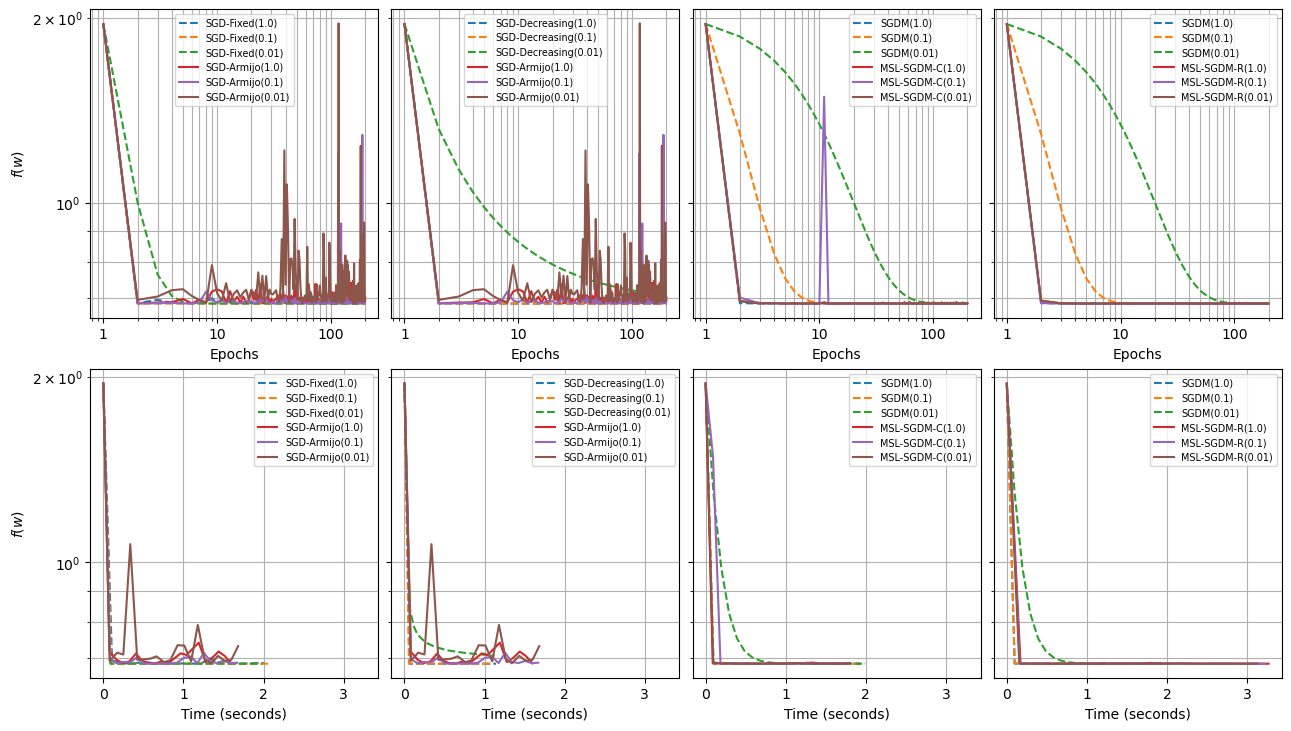

In [15]:
diagnostic([sgdfixed_phish, sgddecre_phish, sgdm_phish, sgdarmijo_phish, mslc_phish, mslr_phish])
plt.savefig("./plots/phish-diagnostic.pdf")

# a2a

In [41]:
data_info(load_a2a())

X_train = (2265, 120), y_train = (2265,)
X_test = (30296, 120), y_test = (30296,)
Class distribution: {-1.0: 0.7474613686534216, 1.0: 0.2525386313465784}


In [27]:
Ma2a_grid = (32, 64)
for i in Ma2a_grid:
    print(f"Iterations: {load_a2a()[1].size / i}")

Iterations: 70.78125
Iterations: 35.390625


## Benchmark

In [28]:
bencha2a = run_bench(load_a2a(), C)

bencha2a_data = optim_bench(bencha2a)

## Fine-tuning

In [29]:
batchfixed_a2a1, _ = grid_search("SGD-Fixed", C, load_a2a(), (load_a2a()[1].size,), sgd_steps)

{'batch': 2265, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 0.404081
Number of combinations analyzed: 6
-----
Solver: SGD-Fixed
Test score: 0.8223857935040929
Objective function: 0.594416
Grad norm: 0.363976
Sol norm: 0.355752
Run-time (seconds): 0.206760
Epochs: 600


In [30]:
sgdfixed_a2a1, _ = grid_search("SGD-Fixed", C, load_a2a(), Ma2a_grid, sgd_steps)
print("% ------- %")
sgddecre_a2a1, _ = grid_search("SGD-Decreasing", C, load_a2a(), Ma2a_grid, sgdd_steps)
print("% ------- %")
sgdm_a2a1, _ = grid_search("SGDM", C, load_a2a(), Ma2a_grid, sgd_steps)

{'batch': 32, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 4.762324
Number of combinations analyzed: 12
-----
Solver: SGD-Fixed
Test score: 0.8071362556113019
Objective function: 0.602741
Grad norm: 0.356183
Sol norm: 0.425177
Run-time (seconds): 3.559726
Epochs: 600
% ------- %
{'batch': 64, 'alpha': 0.8, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 3.286921
Number of combinations analyzed: 14
-----
Solver: SGD-Decreasing
Test score: 0.7602653815685239
Objective function: 0.564028
Grad norm: 0.000726
Sol norm: 0.438522
Run-time (seconds): 0.168710
Epochs: 59
% ------- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 5.424570
Number of combinations analyzed: 12
-----
Solver: SGDM
Test score: 0.7602983892263006
Objective function: 0.564030
Grad norm: 0.002628
Sol norm: 0.438444
Run-time (seconds): 1.810696
Epochs: 600


In [31]:
sgdarmijo_a2a1, _ = grid_search("SGD-Armijo", C, load_a2a(), Ma2a_grid, sls_steps, delta_a=armijo_damps)
print("% ------- %")
mslc_a2a1, _ = grid_search("MSL-SGDM-C", C, load_a2a(), Ma2a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps)
print("% ------- %")
mslr_a2a1, _ = grid_search("MSL-SGDM-R", C, load_a2a(), Ma2a_grid, sls_steps, delta_a=armijo_damps)

{'batch': 64, 'alpha': 0.5, 'beta': 0, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 34.482313
Number of combinations analyzed: 48
-----
Solver: SGD-Armijo
Test score: 0.8251914444151043
Objective function: 0.603503
Grad norm: 0.397378
Sol norm: 0.344862
Run-time (seconds): 3.961250
Epochs: 600
% ------- %
{'batch': 32, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.3}
Grid search run-time (seconds): 122.504305
Number of combinations analyzed: 144
-----
Solver: MSL-SGDM-C
Test score: 0.8105690520200687
Objective function: 0.585491
Grad norm: 0.290117
Sol norm: 0.406144
Run-time (seconds): 7.036673
Epochs: 600
% ------- %
{'batch': 32, 'alpha': 0.01, 'beta': 0.9, 'delta_a': 0.3, 'delta_m': 0}
Grid search run-time (seconds): 40.207804
Number of combinations analyzed: 48
-----
Solver: MSL-SGDM-R
Test score: 0.7902363348296805
Objective function: 0.577575
Grad norm: 0.228297
Sol norm: 0.413366
Run-time (seconds): 7.631381
Epochs: 600


In [32]:
fine_a2a_data = optim_data([batchfixed_a2a1, sgdfixed_a2a1, sgddecre_a2a1, sgdm_a2a1, sgdarmijo_a2a1, mslc_a2a1, mslr_a2a1])

test_a2a = models_summary(fine_a2a_data, bencha2a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_a2a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
7,SGD-Armijo,0.5,64.0,0.500,0.0,0.603503,0.397378,3.961250,600,0.803091,0.825191,0.654707,0.680243,0.344862
3,SGD-Fixed,0.5,2265.0,1.000,0.0,0.594416,0.363976,0.206760,600,0.805740,0.822386,0.661688,0.678397,0.355752
8,MSL-SGDM-C,0.5,32.0,0.005,0.9,0.585491,0.290117,7.036673,600,0.794702,0.810569,0.617841,0.631790,0.406144
4,SGD-Fixed,0.5,32.0,1.000,0.0,0.602741,0.356183,3.559726,600,0.788079,0.807136,0.640035,0.659046,0.425177
9,MSL-SGDM-R,0.5,32.0,0.010,0.9,0.577575,0.228297,7.631381,600,0.780574,0.790236,0.573084,0.572237,0.413366
6,SGDM,0.5,64.0,0.100,0.9,0.564030,0.002628,1.810696,600,0.748344,0.760298,0.501748,0.500481,0.438444
1,Newton-CG,0.5,NaN,NaN,NaN,0.564027,0.000004,NaN,5,0.748344,0.760265,0.501748,0.500413,0.438972
2,CG,0.5,NaN,NaN,NaN,0.564027,0.000015,NaN,12,0.748344,0.760265,0.501748,0.500413,0.438961
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.564027,0.000012,NaN,8,0.748344,0.760265,0.501748,0.500413,0.438969
5,SGD-Decreasing,0.5,64.0,0.800,0.0,0.564028,0.000726,0.168710,59,0.748344,0.760265,0.501748,0.500413,0.438522


In [33]:
print(test_a2a[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
SGD-Armijo & 600 & 3.961250 & 0.344862 & 0.603503 & 0.397378 & 0.825191 \\
SGD-Fixed & 600 & 0.206760 & 0.355752 & 0.594416 & 0.363976 & 0.822386 \\
MSL-SGDM-C & 600 & 7.036673 & 0.406144 & 0.585491 & 0.290117 & 0.810569 \\
SGD-Fixed & 600 & 3.559726 & 0.425177 & 0.602741 & 0.356183 & 0.807136 \\
MSL-SGDM-R & 600 & 7.631381 & 0.413366 & 0.577575 & 0.228297 & 0.790236 \\
SGDM & 600 & 1.810696 & 0.438444 & 0.564030 & 0.002628 & 0.760298 \\
Newton-CG & 5 & NaN & 0.438972 & 0.564027 & 0.000004 & 0.760265 \\
CG & 12 & NaN & 0.438961 & 0.564027 & 0.000015 & 0.760265 \\
L-BFGS-B & 8 & NaN & 0.438969 & 0.564027 & 0.000012 & 0.760265 \\
SGD-Decreasing & 59 & 0.168710 & 0.438522 & 0.564028 & 0.000726 & 0.760265 \\
\bottomrule
\end{tabular}



## SGD

In [34]:
# BatchGD-Fixed
batchfixed_a2a = run_solvers("SGD-Fixed", C, load_a2a(), load_a2a()[1].size)

Run-time (seconds): 0.262356


In [35]:
# SGD-Fixed
sgdfixed_a2a = run_solvers("SGD-Fixed", C, load_a2a(), 32)
# SGD-Decreasing
sgddecre_a2a = run_solvers("SGD-Decreasing", C, load_a2a(), 64)
# SGDM
sgdm_a2a = run_solvers("SGDM", C, load_a2a(), 64)

Run-time (seconds): 2.979304
Run-time (seconds): 1.543621
Run-time (seconds): 1.506555


In [36]:
# SGD-Armijo
sgdarmijo_a2a = run_solvers("SGD-Armijo", C, load_a2a(), 64, delta_a=0.9)
# MSL-SGDM-C
mslc_a2a = run_solvers("MSL-SGDM-C", C, load_a2a(), 32, delta_a=0.7, delta_m=0.3)
# MSL-SGDM-R
mslr_a2a = run_solvers("MSL-SGDM-R", C, load_a2a(), 32, delta_a=0.3)

Run-time (seconds): 2.761597
Run-time (seconds): 4.906160
Run-time (seconds): 4.512178


In [54]:
modelsa2a_data = optim_data(batchfixed_a2a + sgdfixed_a2a + sgddecre_a2a + sgdm_a2a + sgdarmijo_a2a + mslc_a2a + mslr_a2a)

## Summary

In [55]:
models_summary(modelsa2a_data, bencha2a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.564027,0.000004,NaN,5,0.748344,0.760265,0.501748,0.500413,0.438972
2,CG,0.5,NaN,NaN,NaN,0.564027,0.000015,NaN,12,0.748344,0.760265,0.501748,0.500413,0.438961
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.564027,0.000012,NaN,8,0.748344,0.760265,0.501748,0.500413,0.438969
4,SGD-Fixed,0.5,2265.0,0.10,0.0,0.564027,0.000046,0.064738,200,0.748344,0.760265,0.501748,0.500413,0.438971
10,SGD-Decreasing,0.5,64.0,0.10,0.0,0.564027,0.000063,0.509666,200,0.748344,0.760265,0.501748,0.500413,0.438957
9,SGD-Decreasing,0.5,64.0,1.00,0.0,0.564027,0.000794,0.535604,200,0.748344,0.760265,0.501748,0.500413,0.439149
13,SGDM,0.5,64.0,0.10,0.9,0.564032,0.002789,0.515566,200,0.748344,0.760265,0.501748,0.500413,0.438941
8,SGD-Fixed,0.5,32.0,0.01,0.0,0.564040,0.007099,0.983674,200,0.748344,0.760265,0.501748,0.500413,0.440964
7,SGD-Fixed,0.5,32.0,0.10,0.0,0.564559,0.025339,0.986980,200,0.748344,0.760331,0.501748,0.500597,0.436755
12,SGDM,0.5,64.0,1.00,0.9,0.564561,0.040900,0.526321,200,0.748344,0.760430,0.501748,0.500851,0.424396


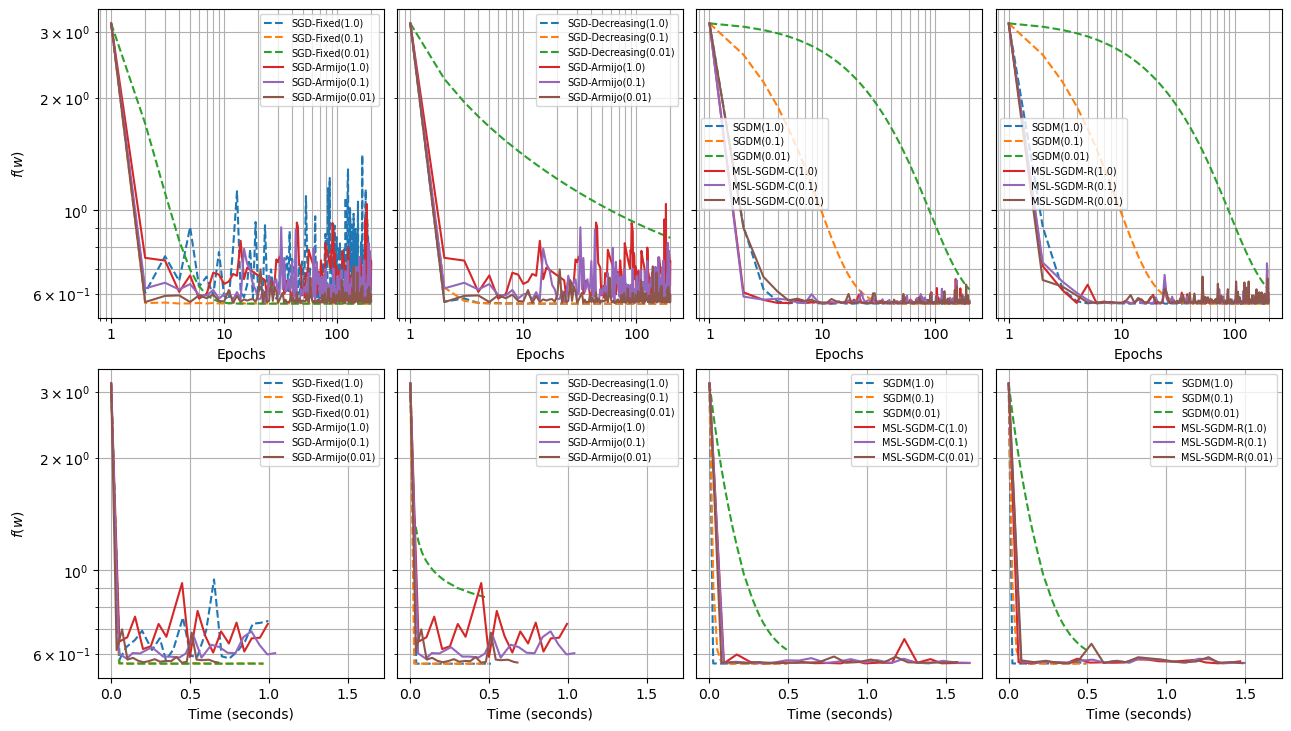

In [37]:
diagnostic([sgdfixed_a2a, sgddecre_a2a, sgdm_a2a, sgdarmijo_a2a, mslc_a2a, mslr_a2a]),
plt.savefig("./plots/a2a-diagnostic.pdf")

# Mushrooms

In [58]:
data_info(load_mushrooms())

X_train = (6499, 113), y_train = (6499,)
X_test = (1625, 113), y_test = (1625,)
Class distribution: {-1: 0.48222803508232037, 1: 0.5177719649176796}


In [42]:
Mmush_grid = (64, 128)
for i in Mmush_grid:
    print(f"Iterations: {load_mushrooms()[1].size / i}")

Iterations: 101.546875
Iterations: 50.7734375


## Benchmark

In [43]:
benchMush = run_bench(load_mushrooms(), C)

benchMush_data = optim_bench(benchMush)

## Fine-tuning

In [44]:
batchfixed_mush1, _ = grid_search("SGD-Fixed", C, load_mushrooms(), (load_mushrooms()[1].size,), sgd_steps)

{'batch': 6499, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 0.973161
Number of combinations analyzed: 6
-----
Solver: SGD-Fixed
Test score: 0.8929230769230769
Objective function: 0.517727
Grad norm: 0.000757
Sol norm: 0.635906
Run-time (seconds): 0.043251
Epochs: 26


In [45]:
sgdfixed_mush1, _ = grid_search("SGD-Fixed", C, load_mushrooms(), Mmush_grid, sgd_steps, n_jobs=8)
print("% ----- %")
sgddecre_mush1, _ = grid_search("SGD-Decreasing", C, load_mushrooms(), Mmush_grid, sgdd_steps, n_jobs=8)
print("% ----- %")
sgdm_mush1, _ = grid_search("SGDM", C, load_mushrooms(), Mmush_grid, sgd_steps, n_jobs=8)

{'batch': 128, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 5.963437
Number of combinations analyzed: 12
-----
Solver: SGD-Fixed
Test score: 0.9261538461538461
Objective function: 0.525499
Grad norm: 0.199874
Sol norm: 0.646431
Run-time (seconds): 3.318288
Epochs: 600
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 5.036299
Number of combinations analyzed: 14
-----
Solver: SGD-Decreasing
Test score: 0.8935384615384615
Objective function: 0.517727
Grad norm: 0.000779
Sol norm: 0.635898
Run-time (seconds): 0.232628
Epochs: 26
% ----- %
{'batch': 128, 'alpha': 1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 6.977057
Number of combinations analyzed: 12
-----
Solver: SGDM
Test score: 0.9243076923076923
Objective function: 0.557069
Grad norm: 0.479065
Sol norm: 0.658660
Run-time (seconds): 3.684742
Epochs: 600


In [46]:
sgdarmijo_mush1, _ = grid_search("SGD-Armijo", C, load_mushrooms(), Mmush_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)
print("% ----- %")
mslc_mush1, _ = grid_search("MSL-SGDM-C", C, load_mushrooms(), Mmush_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=8)
print("% ----- %")
mslr_mush1, _ = grid_search("MSL-SGDM-R", C, load_mushrooms(), Mmush_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)

{'batch': 64, 'alpha': 0.1, 'beta': 0, 'delta_a': 0.5, 'delta_m': 0}
Grid search run-time (seconds): 55.737597
Number of combinations analyzed: 48
-----
Solver: SGD-Armijo
Test score: 0.9532307692307692
Objective function: 0.535765
Grad norm: 0.233549
Sol norm: 0.644938
Run-time (seconds): 11.403854
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.05, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.3}
Grid search run-time (seconds): 185.373587
Number of combinations analyzed: 144
-----
Solver: MSL-SGDM-C
Test score: 0.9427692307692308
Objective function: 0.529380
Grad norm: 0.249789
Sol norm: 0.652698
Run-time (seconds): 6.713060
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0}
Grid search run-time (seconds): 62.273660
Number of combinations analyzed: 48
-----
Solver: MSL-SGDM-R
Test score: 0.9403076923076923
Objective function: 0.527069
Grad norm: 0.232121
Sol norm: 0.642551
Run-time (seconds): 6.445045
Epochs: 600


In [47]:
fine_mush_data = optim_data([batchfixed_mush1, sgdfixed_mush1, sgddecre_mush1, sgdm_mush1, sgdarmijo_mush1, mslc_mush1, mslr_mush1])

test_mush = models_summary(fine_mush_data, benchMush_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_mush

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
7,SGD-Armijo,0.5,64.0,0.10,0.0,0.535765,0.233549,11.403854,600,0.957378,0.953231,0.957417,0.953396,0.644938
8,MSL-SGDM-C,0.5,128.0,0.05,0.9,0.529380,0.249789,6.713060,600,0.953224,0.942769,0.952891,0.942573,0.652698
9,MSL-SGDM-R,0.5,128.0,0.10,0.9,0.527069,0.232121,6.445045,600,0.947684,0.940308,0.946972,0.939506,0.642551
4,SGD-Fixed,0.5,128.0,0.50,0.0,0.525499,0.199874,3.318288,600,0.933220,0.926154,0.931701,0.924477,0.646431
6,SGDM,0.5,128.0,1.00,0.9,0.557069,0.479065,3.684742,600,0.935990,0.924308,0.937475,0.926352,0.658660
5,SGD-Decreasing,0.5,64.0,0.10,0.0,0.517727,0.000779,0.232628,26,0.895676,0.893538,0.892565,0.890219,0.635898
1,Newton-CG,0.5,NaN,NaN,NaN,0.517726,0.000003,NaN,7,0.895522,0.892923,0.892406,0.889580,0.635933
2,CG,0.5,NaN,NaN,NaN,0.517726,0.000024,NaN,11,0.895522,0.892923,0.892406,0.889580,0.635939
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.517726,0.000017,NaN,10,0.895522,0.892923,0.892406,0.889580,0.635930
3,SGD-Fixed,0.5,6499.0,0.50,0.0,0.517727,0.000757,0.043251,26,0.895369,0.892923,0.892246,0.889580,0.635906


In [48]:
print(test_mush[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
SGD-Armijo & 600 & 11.403854 & 0.644938 & 0.535765 & 0.233549 & 0.953231 \\
MSL-SGDM-C & 600 & 6.713060 & 0.652698 & 0.529380 & 0.249789 & 0.942769 \\
MSL-SGDM-R & 600 & 6.445045 & 0.642551 & 0.527069 & 0.232121 & 0.940308 \\
SGD-Fixed & 600 & 3.318288 & 0.646431 & 0.525499 & 0.199874 & 0.926154 \\
SGDM & 600 & 3.684742 & 0.658660 & 0.557069 & 0.479065 & 0.924308 \\
SGD-Decreasing & 26 & 0.232628 & 0.635898 & 0.517727 & 0.000779 & 0.893538 \\
Newton-CG & 7 & NaN & 0.635933 & 0.517726 & 0.000003 & 0.892923 \\
CG & 11 & NaN & 0.635939 & 0.517726 & 0.000024 & 0.892923 \\
L-BFGS-B & 10 & NaN & 0.635930 & 0.517726 & 0.000017 & 0.892923 \\
SGD-Fixed & 26 & 0.043251 & 0.635906 & 0.517727 & 0.000757 & 0.892923 \\
\bottomrule
\end{tabular}



## SGD

In [66]:
# BatchGD-Fixed
batchfixed_mush = run_solvers("SGD-Fixed", C, load_mushrooms(), load_mushrooms()[1].size)

Run-time (seconds): 0.650438


In [49]:
# SGD-Fixed
sgdfixed_mush = run_solvers("SGD-Fixed", C, load_mushrooms(), 128)
# SGD-Decreasing
sgddecre_mush = run_solvers("SGD-Decreasing", C, load_mushrooms(), 64)
# SGDM
sgdm_mush = run_solvers("SGDM", C, load_mushrooms(), 128)

Run-time (seconds): 2.491637
Run-time (seconds): 4.524015
Run-time (seconds): 2.455170


In [50]:
# SGD-Armijo
sgdarmijo_mush = run_solvers("SGD-Armijo", C, load_mushrooms(), 64, delta_a=0.5)
# MSL-SGDM-C
mslc_mush = run_solvers("MSL-SGDM-C", C, load_mushrooms(), 128, delta_a=0.7, delta_m=0.3)
# MSL-SGDM-R
mslr_mush = run_solvers("MSL-SGDM-R", C, load_mushrooms(), 128, delta_a=0.7)

Run-time (seconds): 7.501374
Run-time (seconds): 4.100100
Run-time (seconds): 4.062687


In [69]:
modelsMush_data = optim_data(batchfixed_mush + sgdfixed_mush + sgddecre_mush + sgdm_mush + sgdarmijo_mush + mslc_mush + mslr_mush)

## Summary

In [70]:
models_summary(modelsMush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.517726,0.000003,NaN,7,0.895522,0.892923,0.892406,0.889580,0.635933
2,CG,0.5,NaN,NaN,NaN,0.517726,0.000024,NaN,11,0.895522,0.892923,0.892406,0.889580,0.635939
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.517726,0.000017,NaN,10,0.895522,0.892923,0.892406,0.889580,0.635930
4,SGD-Fixed,0.5,6499.0,0.10,0.0,0.517726,0.000046,0.203572,200,0.895522,0.892923,0.892406,0.889580,0.635932
10,SGD-Decreasing,0.5,64.0,0.10,0.0,0.517726,0.000112,1.485523,200,0.895522,0.892923,0.892406,0.889580,0.635950
8,SGD-Fixed,0.5,128.0,0.01,0.0,0.517727,0.002024,0.843389,200,0.895215,0.892923,0.892087,0.889580,0.636349
9,SGD-Decreasing,0.5,64.0,1.00,0.0,0.517727,0.002026,1.519188,200,0.895215,0.892308,0.892087,0.888940,0.636367
13,SGDM,0.5,128.0,0.10,0.9,0.517738,0.008058,0.868755,200,0.896138,0.894769,0.893077,0.891498,0.635850
12,SGDM,0.5,128.0,1.00,0.9,0.517911,0.027192,0.840400,200,0.898292,0.897231,0.895332,0.894055,0.637874
7,SGD-Fixed,0.5,128.0,0.10,0.0,0.517936,0.027047,0.852567,200,0.896753,0.894154,0.893737,0.890905,0.641649


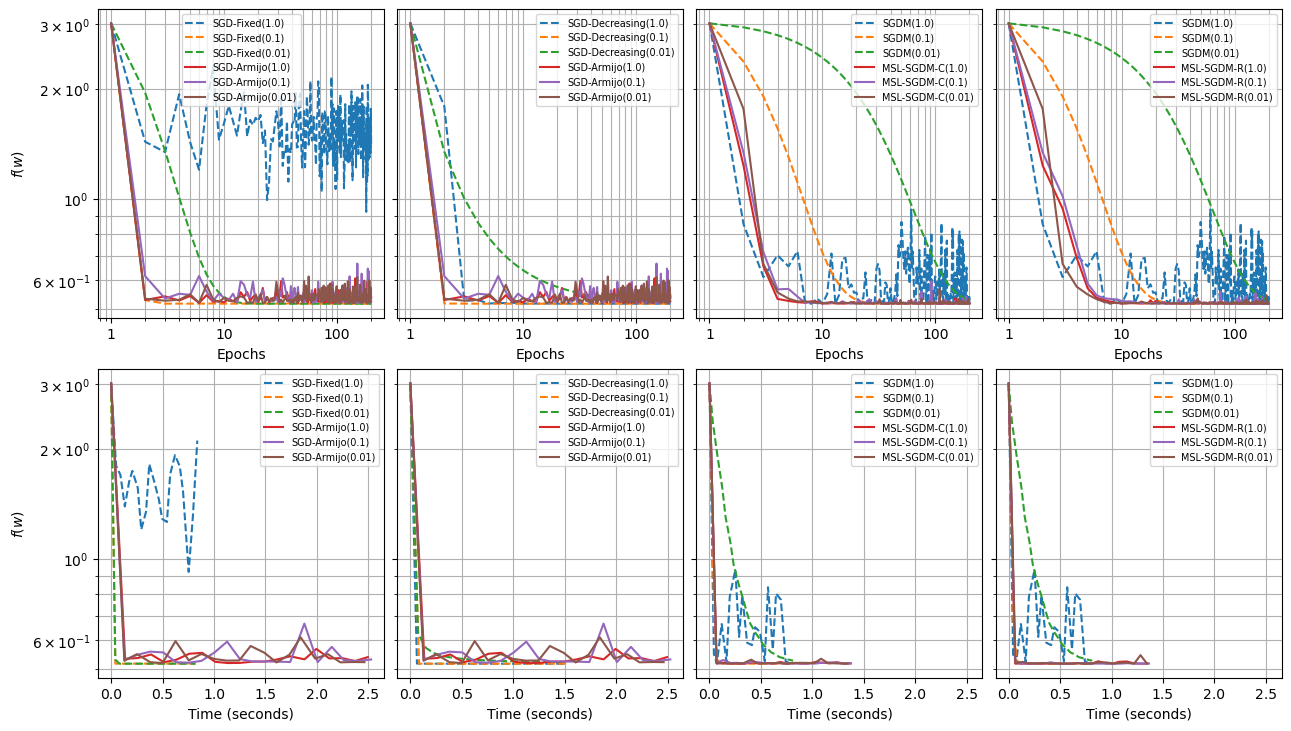

In [51]:
diagnostic([sgdfixed_mush, sgddecre_mush, sgdm_mush, sgdarmijo_mush, mslc_mush, mslr_mush]),
plt.savefig("./plots/mush-diagnostic.pdf")

# German

In [72]:
data_info(load_german())

X_train = (800, 25), y_train = (800,)
X_test = (200, 25), y_test = (200,)
Class distribution: {-1.0: 0.69875, 1.0: 0.30125}


In [52]:
Mgerman_grid = (16, 32)
for i in Mgerman_grid:
    print(f"Iterations: {load_german()[1].size / i}")

Iterations: 50.0
Iterations: 25.0


## Benchmark

In [53]:
benchgerman = run_bench(load_german(), C)

benchgerman_data = optim_bench(benchgerman)

## Fine-tuning

In [54]:
batchfixed_german1, _ = grid_search("SGD-Fixed", C, load_german(), (load_german()[1].size,), sgd_steps)

{'batch': 800, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 0.225117
Number of combinations analyzed: 6
-----
Solver: SGD-Fixed
Test score: 0.71
Objective function: 0.597303
Grad norm: 0.000882
Sol norm: 0.358324
Run-time (seconds): 0.005002
Epochs: 20


In [55]:
sgdfixed_german1, _ = grid_search("SGD-Fixed", C, load_german(), Mgerman_grid, sgdd_steps)
print("% ----- %")
sgddecre_german1, _ = grid_search("SGD-Decreasing", C, load_german(), Mgerman_grid, sgd_steps)
print("% ----- %")
sgdm_german1, _ = grid_search("SGDM", C, load_german(), Mgerman_grid, sgd_steps)

{'batch': 16, 'alpha': 0.005, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 3.670053
Number of combinations analyzed: 14
-----
Solver: SGD-Fixed
Test score: 0.71
Objective function: 0.597303
Grad norm: 0.000675
Sol norm: 0.358265
Run-time (seconds): 0.234546
Epochs: 58
% ----- %
{'batch': 16, 'alpha': 0.01, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 2.348501
Number of combinations analyzed: 12
-----
Solver: SGD-Decreasing
Test score: 0.72
Objective function: 0.607993
Grad norm: 0.113583
Sol norm: 0.348660
Run-time (seconds): 2.291817
Epochs: 600
% ----- %
{'batch': 16, 'alpha': 1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 3.789350
Number of combinations analyzed: 12
-----
Solver: SGDM
Test score: 0.745
Objective function: 0.616375
Grad norm: 0.313714
Sol norm: 0.313661
Run-time (seconds): 2.389008
Epochs: 600


In [56]:
sgdarmijo_german1, _ = grid_search("SGD-Armijo", C, load_german(), Mgerman_grid, sls_steps, delta_a=armijo_damps)
print("% ----- %")
mslc_german1, _ = grid_search("MSL-SGDM-C", C, load_german(), Mgerman_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps)
print("% ----- %")
mslr_german1, _ = grid_search("MSL-SGDM-R", C, load_german(), Mgerman_grid, sls_steps, delta_a=armijo_damps)

{'batch': 16, 'alpha': 0.5, 'beta': 0, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 26.018028
Number of combinations analyzed: 48
-----
Solver: SGD-Armijo
Test score: 0.75
Objective function: 0.632348
Grad norm: 0.362572
Sol norm: 0.423356
Run-time (seconds): 5.095544
Epochs: 600
% ----- %
{'batch': 16, 'alpha': 0.5, 'beta': 0.9, 'delta_a': 0.3, 'delta_m': 0.3}
Grid search run-time (seconds): 89.717407
Number of combinations analyzed: 144
-----
Solver: MSL-SGDM-C
Test score: 0.755
Objective function: 0.629212
Grad norm: 0.364526
Sol norm: 0.365021
Run-time (seconds): 4.999331
Epochs: 600
% ----- %
{'batch': 16, 'alpha': 0.05, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 31.190798
Number of combinations analyzed: 48
-----
Solver: MSL-SGDM-R
Test score: 0.73
Objective function: 0.599779
Grad norm: 0.073177
Sol norm: 0.373225
Run-time (seconds): 5.652461
Epochs: 600


In [57]:
fine_german_data = optim_data([batchfixed_german1, sgdfixed_german1, sgddecre_german1, sgdm_german1, sgdarmijo_german1, mslc_german1, mslr_german1])

test_german = models_summary(fine_german_data, benchgerman_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_german

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
8,MSL-SGDM-C,0.5,16.0,0.500,0.9,0.629212,0.364526,4.999331,600,0.74625,0.755,0.655553,0.663601,0.365021
7,SGD-Armijo,0.5,16.0,0.500,0.0,0.632348,0.362572,5.095544,600,0.73875,0.750,0.664349,0.699483,0.423356
6,SGDM,0.5,16.0,1.000,0.9,0.616375,0.313714,2.389008,600,0.75375,0.745,0.632595,0.631867,0.313661
9,MSL-SGDM-R,0.5,16.0,0.050,0.9,0.599779,0.073177,5.652461,600,0.71625,0.730,0.546749,0.562087,0.373225
5,SGD-Decreasing,0.5,16.0,0.010,0.0,0.607993,0.113583,2.291817,600,0.70500,0.720,0.511554,0.530352,0.348660
1,Newton-CG,0.5,NaN,NaN,NaN,0.597303,0.000010,NaN,5,0.70375,0.710,0.511839,0.513403,0.358504
2,CG,0.5,NaN,NaN,NaN,0.597303,0.000004,NaN,12,0.70375,0.710,0.511839,0.513403,0.358506
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.597303,0.000014,NaN,7,0.70375,0.710,0.511839,0.513403,0.358506
4,SGD-Fixed,0.5,16.0,0.005,0.0,0.597303,0.000675,0.234546,58,0.70375,0.710,0.511839,0.513403,0.358265
3,SGD-Fixed,0.5,800.0,0.500,0.0,0.597303,0.000882,0.005002,20,0.70375,0.710,0.511839,0.513403,0.358324


In [58]:
print(test_german[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
MSL-SGDM-C & 600 & 4.999331 & 0.365021 & 0.629212 & 0.364526 & 0.755000 \\
SGD-Armijo & 600 & 5.095544 & 0.423356 & 0.632348 & 0.362572 & 0.750000 \\
SGDM & 600 & 2.389008 & 0.313661 & 0.616375 & 0.313714 & 0.745000 \\
MSL-SGDM-R & 600 & 5.652461 & 0.373225 & 0.599779 & 0.073177 & 0.730000 \\
SGD-Decreasing & 600 & 2.291817 & 0.348660 & 0.607993 & 0.113583 & 0.720000 \\
Newton-CG & 5 & NaN & 0.358504 & 0.597303 & 0.000010 & 0.710000 \\
CG & 12 & NaN & 0.358506 & 0.597303 & 0.000004 & 0.710000 \\
L-BFGS-B & 7 & NaN & 0.358506 & 0.597303 & 0.000014 & 0.710000 \\
SGD-Fixed & 58 & 0.234546 & 0.358265 & 0.597303 & 0.000675 & 0.710000 \\
SGD-Fixed & 20 & 0.005002 & 0.358324 & 0.597303 & 0.000882 & 0.710000 \\
\bottomrule
\end{tabular}



## SGD

In [80]:
# BatchGD-Fixed
batchfixed_german = run_solvers("SGD-Fixed", C, load_german(), load_german()[1].size)

Run-time (seconds): 0.144740


In [59]:
# SGD-Fixed
sgdfixed_german = run_solvers("SGD-Fixed", C, load_german(), 16)
# SGD-Decreasing
sgddecre_german = run_solvers("SGD-Decreasing", C, load_german(), 16)
# SGDM
sgdm_german = run_solvers("SGDM", C, load_german(), 16)

Run-time (seconds): 2.086573
Run-time (seconds): 2.091928
Run-time (seconds): 2.062467


In [60]:
# SGD-Armijo
sgdarmijo_german = run_solvers("SGD-Armijo", C, load_german(), 16, delta_a=0.9)
# MSL-SGDM-C
mslc_german = run_solvers("MSL-SGDM-C", C, load_german(), 16, delta_a=0.3, delta_m=0.3)
# MSL-SGDM-R
mslr_german = run_solvers("MSL-SGDM-R", C, load_german(), 16, delta=0.9)

Run-time (seconds): 3.750544
Run-time (seconds): 3.344888
Run-time (seconds): 3.336490


In [83]:
modelsgerman_data = optim_data(batchfixed_german + sgdfixed_german + sgddecre_german + sgdm_german + sgdarmijo_german + mslc_german + mslr_german)

## Summary

In [84]:
models_summary(modelsgerman_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.597303,0.000010,NaN,5,0.70375,0.710,0.511839,0.513403,0.358504
2,CG,0.5,NaN,NaN,NaN,0.597303,0.000004,NaN,12,0.70375,0.710,0.511839,0.513403,0.358506
4,SGD-Fixed,0.5,800.0,0.10,0.0,0.597303,0.000007,0.051428,200,0.70375,0.710,0.511839,0.513403,0.358503
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.597303,0.000014,NaN,7,0.70375,0.710,0.511839,0.513403,0.358506
10,SGD-Decreasing,0.5,16.0,0.10,0.0,0.597303,0.000081,0.701507,200,0.70375,0.710,0.511839,0.513403,0.358516
9,SGD-Decreasing,0.5,16.0,1.00,0.0,0.597304,0.002657,0.694386,200,0.70375,0.710,0.511839,0.513403,0.357565
8,SGD-Fixed,0.5,32.0,0.01,0.0,0.597304,0.002731,0.372772,200,0.70375,0.710,0.511839,0.513403,0.357556
13,SGDM,0.5,16.0,0.10,0.9,0.597312,0.003659,0.701680,200,0.70375,0.710,0.511839,0.513403,0.356870
7,SGD-Fixed,0.5,32.0,0.10,0.0,0.597712,0.027606,0.371302,200,0.70375,0.710,0.511839,0.513403,0.341221
19,MSL-SGDM-C,0.5,32.0,0.10,0.9,0.598201,0.044222,0.696750,200,0.70875,0.715,0.521318,0.521878,0.355303


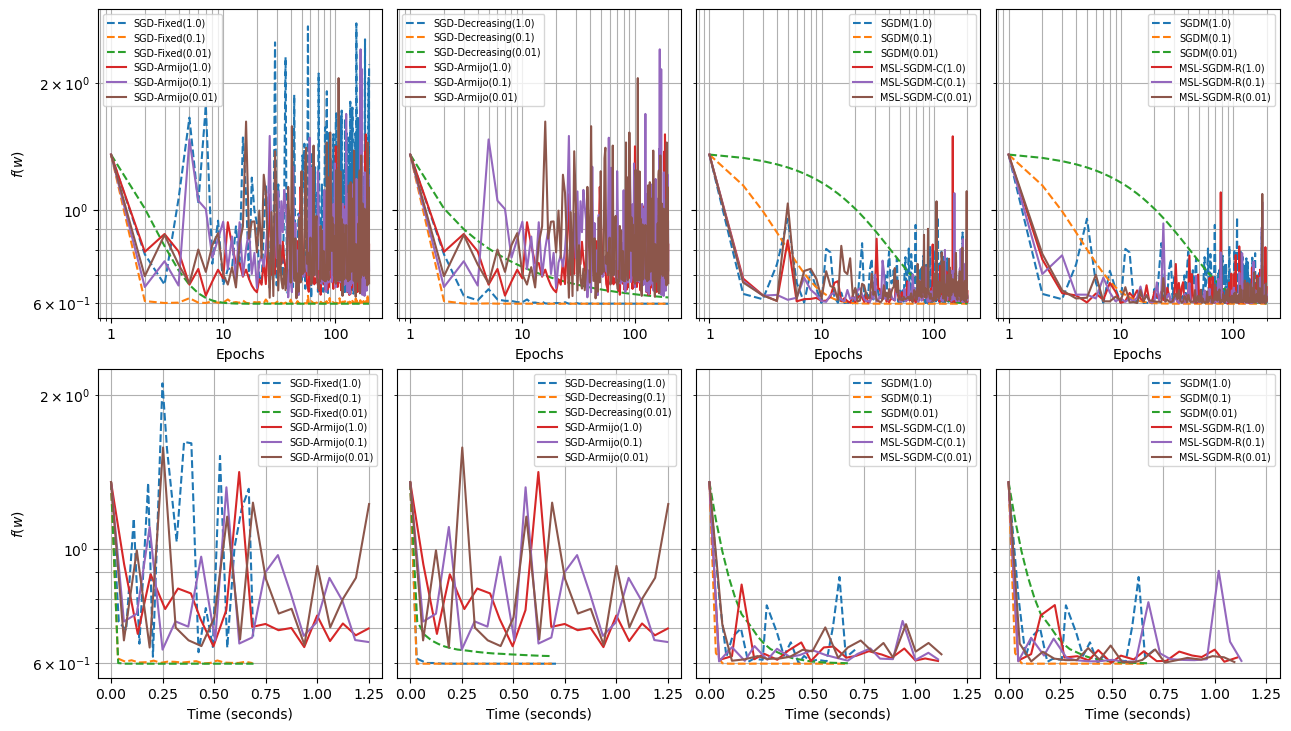

In [61]:
diagnostic([sgdfixed_german, sgddecre_german, sgdm_german, sgdarmijo_german, mslc_german, mslr_german]),
plt.savefig("./plots/german-diagnostic.pdf")